In [ ]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

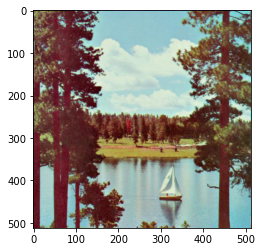

In [ ]:
im = read_im(pathlib.Path("images", "lake.jpg"))
plt.imshow(im)

In [11]:
def convolve_im(im, kernel,
):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3

    height = im.shape[0]
    width = im.shape[1]
    kernel_dim_divided = kernel.shape[0] // 2

    computed = np.zeros(shape=(height, width, im.shape[2]))

    for channel_index in range(im.shape[2]):  # RGB channel
        for h_index in range(height):
            for w_index in range(width):
                pixel_value = 0.0
                for i in range(-kernel_dim_divided, kernel_dim_divided + 1):
                    h_coor = h_index - i
                    if h_coor < 0 or h_coor >= height:
                        continue
                    for j in range(-kernel_dim_divided, kernel_dim_divided + 1):
                        # Minus since we are using applying convolution
                        w_coor = w_index - j
                        if w_coor < 0 or w_coor >= width:
                            continue
                        pixel_value += kernel[kernel_dim_divided + i,
                                              kernel_dim_divided + j] * im[h_coor, w_coor, channel_index]
                computed[h_index, w_index, channel_index] = pixel_value

    return computed

In [12]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

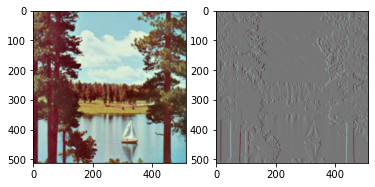

In [13]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()